In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import subprocess

In [2]:
# first call bash script to get necessary file inputs
# for worms verification: use 2019_classify_labels csv from plot1 directory to get manual classifications
subprocess.call(['./exec.sh'])

0

In [3]:
# initialize data frame from input
samples = pd.read_csv("long_transect.csv")
# calculate concentration from abundance and volume
samples['concentration'] = samples.Abundance/samples.volume_imaged
# convert to float
samples.concentration = samples.concentration.astype(float)

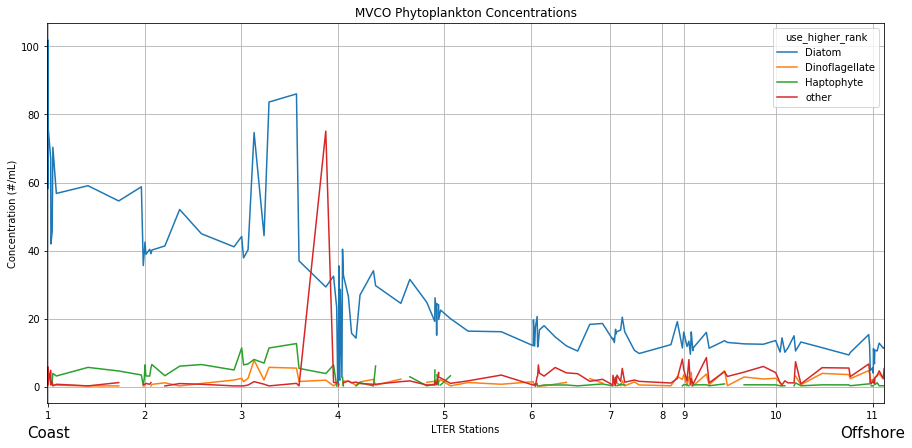

In [4]:
# take duplicate latitudes and add their concentrations together
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
grouped = samples.groupby(['gps_furuno_latitude','use_higher_rank']).sum()['concentration']
grouped.unstack().plot(ax=ax)
# add titles and axes labels
plt.xlabel('LTER Stations')
plt.ylabel('Concentration (#/mL)')
plt.title('MVCO Phytoplankton Concentrations')
plt.grid(True)
# set stations as tick marks
ax.set_xticks([41.1967, 41.03, 40.8633, 40.6967, 40.5133, 40.3633, 40.2267, 40.1367, 40.0983, 39.94, 39.7733])
ax.set_xticklabels(np.arange(1,12))
# set comments
ax.text(41.1967, -15, "Coast", size = 15, ha = 'center')
ax.text(39.7733, -15, "Offshore", size = 15, ha = 'center')
# invert x axis
ax.invert_xaxis()
plt.show()